In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#set seeds for reproducibility
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

import os
import json
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import cv2


2025-08-31 04:52:54.317117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756615974.653905      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756615974.751974      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
print(os.listdir("/kaggle/input/plantvillage-dataset"))

print(len(os.listdir(("/kaggle/input/plantvillage-dataset/segmented"))))
print(os.listdir("/kaggle/input/plantvillage-dataset/segmented"))

print(len(os.listdir(("/kaggle/input/plantvillage-dataset/color"))))
print(os.listdir("/kaggle/input/plantvillage-dataset/color"))

print(len(os.listdir(("/kaggle/input/plantvillage-dataset/grayscale")))) # number of classes is 38 in the grayscale folder
print(os.listdir("/kaggle/input/plantvillage-dataset/grayscale"))

print(len(os.listdir(("/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab"))))
print(os.listdir("/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab"))

['segmented', 'grayscale', 'plantvillage dataset', 'color']
38
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Me

In [4]:
#dataset path
base_dir = "/kaggle/input/plantvillage-dataset/color"

# Data preprocessing
image_size = 224  # Image size
BATCH_SIZE = 32

# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(image_size, image_size),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(image_size, image_size),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [6]:
# Model definition using your sequential technique
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(image_size, image_size, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1756616036.013486      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1756616036.014421      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)  

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1756616045.154513     110 service.cc:148] XLA service 0x78e91000ac50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756616045.156147     110 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1756616045.156171     110 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1756616045.478183     110 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/1358 ━━━━━━━━━━━━━━━━━━━━ 2:50:50 8s/step - accuracy: 0.0625 - loss: 3.6342

I0000 00:00:1756616050.245391     110 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 828s 605ms/step - accuracy: 0.5496 - loss: 1.9379 - val_accuracy: 0.8111 - val_loss: 0.6150
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 635s 467ms/step - accuracy: 0.8341 - loss: 0.5334 - val_accuracy: 0.8623 - val_loss: 0.4363
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 635s 468ms/step - accuracy: 0.8798 - loss: 0.3746 - val_accuracy: 0.8869 - val_loss: 0.3512
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 636s 468ms/step - accuracy: 0.9023 - loss: 0.3023 - val_accuracy: 0.8956 - val_loss: 0.3306
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 626s 461ms/step - accuracy: 0.9167 - loss: 0.2500 - val_accuracy: 0.8999 - val_loss: 0.3264


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test accuracy: {test_acc}')

340/340 ━━━━━━━━━━━━━━━━━━━━ 117s 343ms/step - accuracy: 0.8998 - loss: 0.3398
Test accuracy: 0.8987925052642822


Available layers in the model:
0. conv2d - Conv2D
1. max_pooling2d - MaxPooling2D
2. conv2d_1 - Conv2D
3. max_pooling2d_1 - MaxPooling2D
4. flatten - Flatten
5. dense - Dense
6. dense_1 - Dense


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


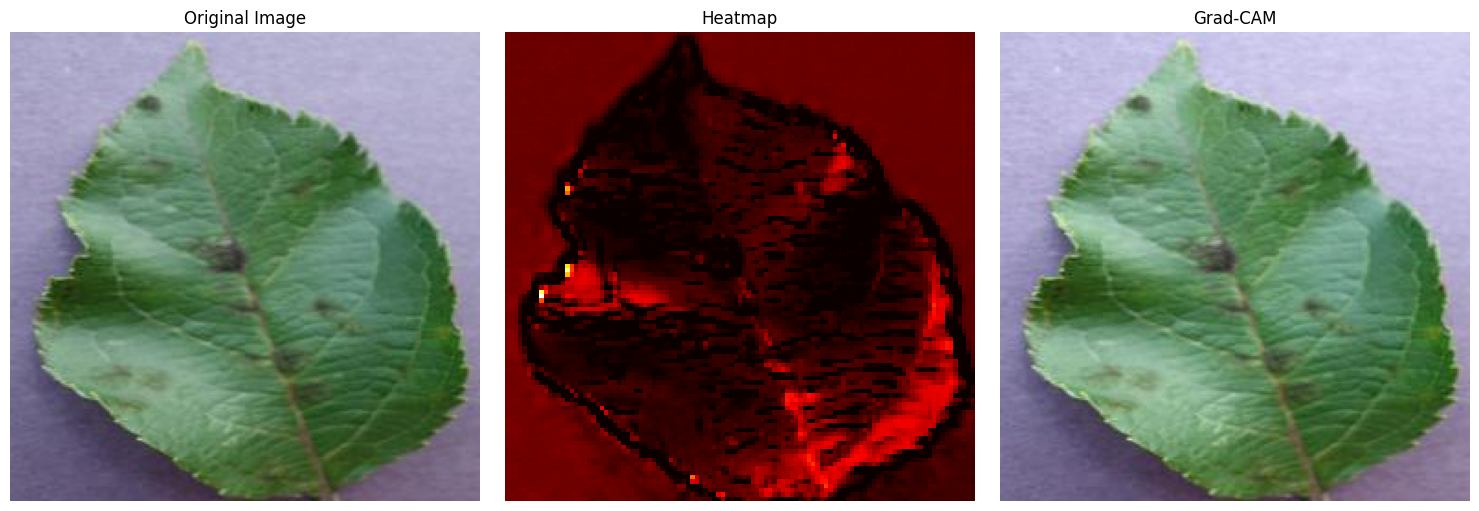

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted class: Apple___Apple_scab
Confidence: 1114.17%

Top predictions:
1. Apple___Apple_scab: 1114.17%
2. Apple___healthy: 817.49%
3. Potato___Late_blight: 700.50%
4. Pepper,_bell___healthy: 396.99%
5. Tomato___Septoria_leaf_spot: 383.94%


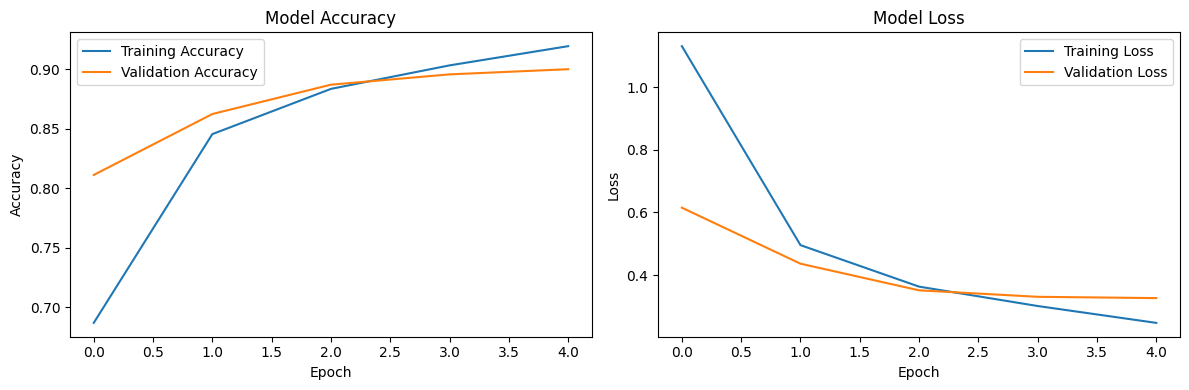

In [22]:
# Alternative Grad-CAM implementation that doesn't require accessing model.output
def make_gradcam_heatmap_fixed(img_array, model, last_conv_layer_name, pred_index=None):
    # First, let's build a proper grad model
    # Get the last convolutional layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    
    # Create a model that goes from input to the last conv layer output
    last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)
    
    # Create a model that goes from last conv layer output to final output
    # We need to reconstruct the part of the model after the last conv layer
    classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    
    # Find the index of the last conv layer
    last_conv_idx = None
    for i, layer in enumerate(model.layers):
        if layer.name == last_conv_layer_name:
            last_conv_idx = i
            break
    
    if last_conv_idx is None:
        raise ValueError(f"Layer {last_conv_layer_name} not found in model")
    
    # Rebuild the classifier part of the model
    for layer in model.layers[last_conv_idx + 1:]:
        x = layer(x)
    
    classifier_model = tf.keras.Model(classifier_input, x)
    
    # Compute gradients
    with tf.GradientTape() as tape:
        # Get the last conv layer output
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        
        # Get predictions
        preds = classifier_model(last_conv_layer_output)
        
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, last_conv_layer_output)
    
    # Pool gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Compute heatmap
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    
    # Normalize heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Resize heatmap to match original image dimensions
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_resized = np.uint8(255 * heatmap_resized)

    # Use jet colormap to colorize heatmap
    jet = plt.colormaps.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap_resized]

    # Create an image with RGB colorized heatmap
    jet_heatmap = np.array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display Grad CAM
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(img / 255.0)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap, cmap='hot')
    plt.title("Heatmap")
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(superimposed_img)
    plt.title("Grad-CAM")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Test Grad-CAM on a sample image
image_path = "/kaggle/input/plantvillage-dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG"

# Preprocess the image
img = tf.keras.preprocessing.image.load_img(image_path, target_size=(image_size, image_size))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Find the correct convolutional layer name for Grad-CAM
print("Available layers in the model:")
for i, layer in enumerate(model.layers):
    print(f"{i}. {layer.name} - {type(layer).__name__}")

# Use the last convolutional layer for Grad-CAM
last_conv_layer_name = "conv2d_1"

# Generate class activation heatmap using the fixed function
heatmap = make_gradcam_heatmap_fixed(img_array, model, last_conv_layer_name)

# Display the heatmap
save_and_display_gradcam(image_path, heatmap)

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction[0])
class_names = list(train_generator.class_indices.keys())
print(f"Predicted class: {class_names[predicted_class]}")
print(f"Confidence: {prediction[0][predicted_class]:.2%}")

# Display top predictions
top_n = 5
top_indices = np.argsort(prediction[0])[-top_n:][::-1]
print("\nTop predictions:")
for i, idx in enumerate(top_indices):
    print(f"{i+1}. {class_names[idx]}: {prediction[0][idx]:.2%}")

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
model.save_weights("model_weights.weights.h5")
print("Model weights successfully saved as 'model_weights.weights.h5'")

Model weights successfully saved as 'model_weights.weights.h5'
